In [1]:
#import json
import numpy as np
from scipy.spatial import Delaunay

# JSON data from the gist above.
# coordinates = [f['geometry']['coordinates'] for f in json.loads(data)]
# points = np.array(coordinates)
# tri = Delaunay(np.array(points))

# Rest as in SO post above.

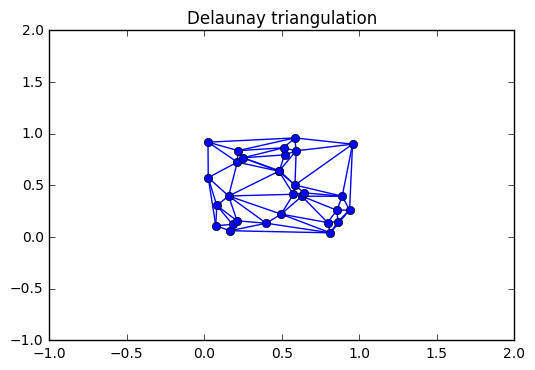

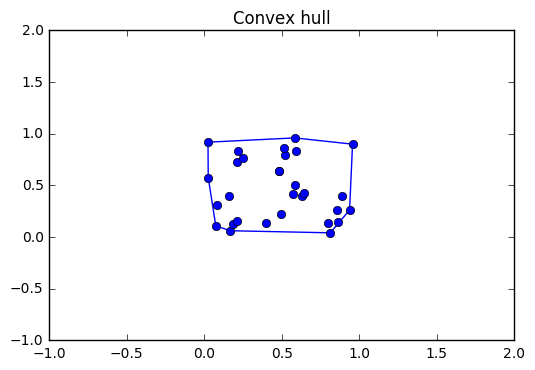

In [112]:

points = np.random.rand(30, 2) # 30 points in 2-d
tri = Delaunay(points)

# Make a list of line segments: 
# edge_points = [ ((x1_1, y1_1), (x2_1, y2_1)),
#                 ((x1_2, y1_2), (x2_2, y2_2)),
#                 ... ]
edge_points = []
edges = set()

def add_edge(i, j):
    """Add a line between the i-th and j-th points, if not in the list already"""
    if (i, j) in edges or (j, i) in edges:
        # already added
        return
    edges.add( (i, j) )
    edge_points.append(points[ [i, j] ])

# loop over triangles: 
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    add_edge(ia, ib)
    add_edge(ib, ic)
    add_edge(ic, ia)

# plot it: the LineCollection is just a (maybe) faster way to plot lots of
# lines at once
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection, PolyCollection

lines = LineCollection(edge_points)
plt.figure()
plt.title('Delaunay triangulation')
plt.gca().add_collection(lines)
plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(-1, 2)
plt.ylim(-1, 2)

# -- the same stuff for the convex hull

edges = set()
edge_points = []

for ia, ib in tri.convex_hull:
    add_edge(ia, ib)

lines = LineCollection(edge_points)
plt.figure()
plt.title('Convex hull')
plt.gca().add_collection(lines)
plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.show()

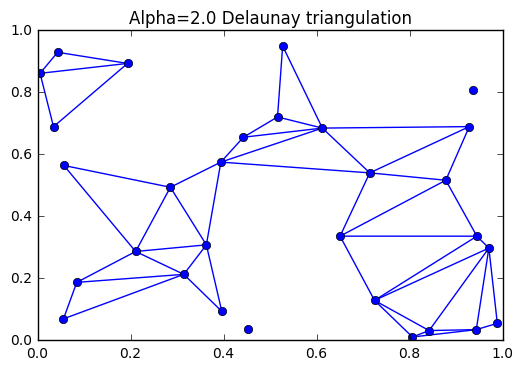

In [3]:
import math

edges = set()
edge_points = []
alpha = 6

# loop over triangles:
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    pa = points[ia]
    pb = points[ib]
    pc = points[ic]

    # Lengths of sides of triangle
    a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
    b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
    c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

    # Semiperimeter of triangle
    s = (a + b + c)/2.0

    # Area of triangle by Heron's formula
    area = math.sqrt(s*(s-a)*(s-b)*(s-c))

    circum_r = a*b*c/(4.0*area)

    # Here's the radius filter.
    if circum_r < 1.0/alpha:
        add_edge(ia, ib)
        add_edge(ib, ic)
        add_edge(ic, ia)

lines = LineCollection(edge_points)
plt.figure()
plt.title('Alpha=2.0 Delaunay triangulation')
plt.gca().add_collection(lines)
plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.show()

Can this be applied to my objects?

In [4]:
import os
import numpy as np
import pandas as pd
import time
import skimage.io as io
io.use_plugin('tifffile')
import glob
from skimage import morphology
import mahotas as mh
from skimage.filters import threshold_adaptive
from scipy.ndimage import distance_transform_edt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from skimage.measure import regionprops

from skimage.morphology import watershed
from skimage.feature import peak_local_max
from scipy import ndimage

In [5]:
#load Hoechst and GFP stacks from .ome.tif files
def load_ome(ome_stack_file):

    #MMStack .ome.tif files load channel,z,y,x
    #Check file contains .ome.tif
    if '.ome.tif' in ome_stack_file:

        #Load the file
        im=io.imread(ome_stack_file)

        #Select Hoechst stack
        Hoechst_stack = im[0,:,:,:] #Hoechst Channel = 0
        GFP_stack = im[1,:,:,:]     #GFP Channel = 1
        
        #
        return [Hoechst_stack, GFP_stack]
        #return GFP_stack
        
    else:
        print 'this is not an ome.tif'

In [6]:
#[2] Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/'

target='.ome.tif'

filelist=glob.glob(path+str('*')+target)

shell_list=glob.glob(path+str('/Output/Shells/*Split_Shells.npy'))

In [7]:
[Hoechst_stack, GFP_stack] = load_ome(filelist[4])

In [8]:
#[1] Get targeted filelist
path='C:/Users/David Brown/Documents/Huang Lab/Exp0104_KDM5A_PHD2-fragments/Output/'

target='_Mask5.npy'

masklist=glob.glob(path+str('*')+target)

In [9]:
mask5 = np.load(masklist[1])

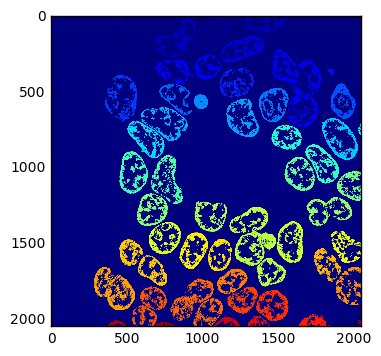

In [10]:
plt.imshow(mask5[8])

In [195]:
z=4
obj=6

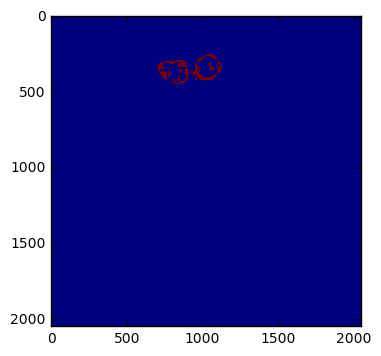

In [196]:
plt.imshow(mask5[z]==obj)

In [197]:
##Convert mask to points
points=np.transpose(np.nonzero(mask5[z]==obj))

#convert row, column coordinates to x, y
points = np.fliplr(points)

tri = Delaunay(points)

In [198]:
def Mask2Points(binary_mask):
    
    points=np.transpose(np.nonzero(binary_mask))
    
    print(len(points))

    #Return row, column coordinates converted to x, y
    return np.fliplr(points)

(600, 0)

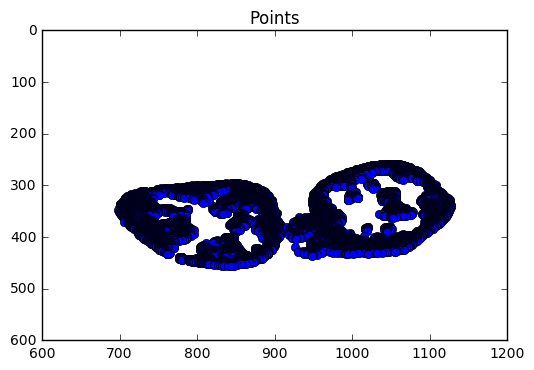

In [201]:
edge_points = []
edges = set()

# loop over triangles: 
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    add_edge(ia, ib)
    add_edge(ib, ic)
    add_edge(ic, ia)

plt.figure()
plt.title('Points')
plt.plot(points[:,0], points[:,1], 'o', hold=1) #row column coordinates are mixed
plt.xlim(600, 1200)  
plt.ylim(600, 0)

(600, 0)

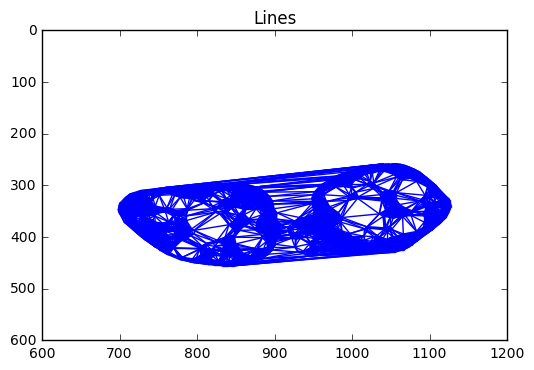

In [202]:
lines = LineCollection(edge_points)
plt.figure()
plt.title('Lines')
plt.gca().add_collection(lines)
plt.xlim(600, 1200)  
plt.ylim(600, 0)     #Flip y axis

(600, 0)

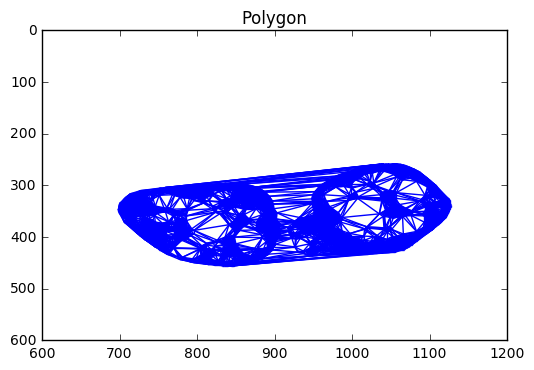

In [203]:
poly = PolyCollection(edge_points)
poly.set_color('blue')
plt.figure()
plt.title('Polygon')
plt.gca().add_collection(poly)
plt.xlim(600, 1200)  
plt.ylim(600, 0)    #Flip y axis

What about alpha?

64935


(600, 0)

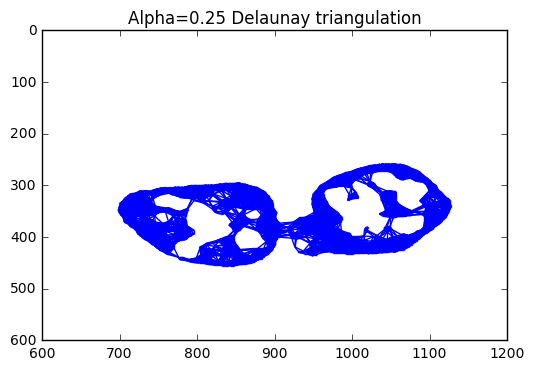

In [208]:
edges = set()
edge_points = []
alpha = 0.1

# loop over triangles:
# ia, ib, ic = indices of corner points of the triangle
for ia, ib, ic in tri.vertices:
    pa = points[ia]
    pb = points[ib]
    pc = points[ic]

    # Lengths of sides of triangle
    a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
    b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
    c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

    # Semiperimeter of triangle
    s = (a + b + c)/2.0

    # Area of triangle by Heron's formula
    area = math.sqrt(s*(s-a)*(s-b)*(s-c))

    circum_r = a*b*c/(4.0*area)

    # Here's the radius filter.
    if circum_r < 1.0/alpha:
        add_edge(ia, ib)
        add_edge(ib, ic)
        add_edge(ic, ia)

print len(edge_points)
lines = LineCollection(edge_points)
plt.figure()
plt.title('Alpha=0.25 Delaunay triangulation')
plt.gca().add_collection(lines)
plt.xlim(600, 1200)  
plt.ylim(600, 0)

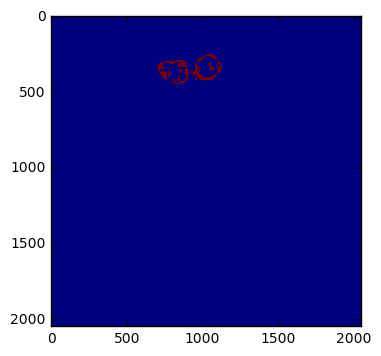

In [189]:
plt.imshow(mask5[4]==obj)

In [241]:
def AlphaShape(points, triangles, alpha=0.25):
    
    edges = set()
    edge_points = []

    print str(len(tri.vertices))+' triangles detected'
    
    #Not sure why, but this function must be embedded.
    def add_edge(i, j):
        """Add a line between the i-th and j-th points, if not in the list already"""
        if (i, j) in edges or (j, i) in edges:
            # already added
            return
        edges.add( (i, j) )
        edge_points.append(points[ [i, j] ])
        #End of function

    # loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]

        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

        # Semiperimeter of triangle
        s = (a + b + c)/2.0

        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))

        if area>0:
            circum_r = a*b*c/(4.0*area)

            # Here's the radius filter.
            if circum_r < 1.0/alpha:
                add_edge(ia, ib)
                add_edge(ib, ic)
                add_edge(ic, ia)

    print len(edge_points)    
    return edge_points

In [211]:
#[1] Mask 2 Points
points = Mask2Points(mask5[4]==obj)

21820


In [212]:
#[2] Delaunay Triangles
triangles = Delaunay(points)
len(triangles.vertices)

43581

In [213]:
#[3] Alpha Shape
edge_points = AlphaShape(points, triangles, alpha=0.1)

64935


In [243]:
#[4] Convert points to boundary
def edges2path(edge_points):
    m = MultiLineString(edge_points)
    triangles = list(polygonize(m))
    #boundary = cascaded_union(triangles)
    ptch = PolygonPatch(cascaded_union(triangles))
    polypath = ptch.get_path()
    return polypath

In [244]:
polypath = edges2path(edge_points)

In [224]:
#[5] Path to Mask
def path2mask(stack, polypath):

    #Check shape of stack
    shape=stack.shape

    #flip x and y to r and c
    vert = np.fliplr(polypath.vertices)

    #Generate binary mask
    mask8 = grid_points_in_poly(shape, vert)

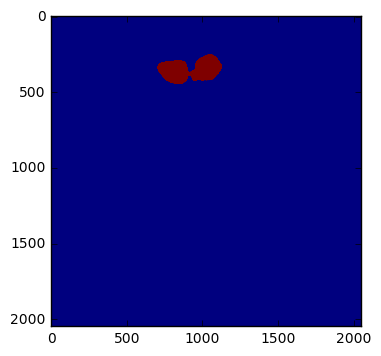

In [225]:
path2mask(mask5[z], polypath)
plt.imshow(mask8)

In [98]:
##loop through stack


66298

In [60]:
#I have the edge_points of triangles within my cutoff
points

array([[1032,  260],
       [1035,  260],
       [1036,  260],
       ..., 
       [ 850,  453],
       [ 849,  454],
       [ 850,  454]], dtype=int64)

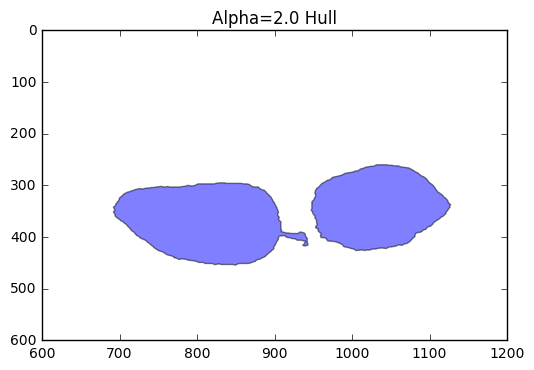

In [61]:
from descartes import PolygonPatch
from shapely.geometry import MultiLineString
from shapely.ops import cascaded_union, polygonize

m = MultiLineString(edge_points)
triangles = list(polygonize(m))

plt.figure()
plt.title("Alpha=2.0 Hull")
plt.gca().add_patch(PolygonPatch(cascaded_union(triangles), alpha=0.5))
plt.gca().autoscale(tight=False)
#plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(600, 0)
plt.show()

Can I now get the contour of the patch?

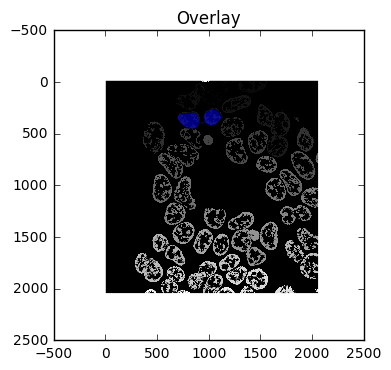

In [62]:
plt.figure()
plt.title("Overlay")
plt.imshow(mask5[8], cmap='gray')
plt.gca().add_patch(PolygonPatch(cascaded_union(triangles), alpha=0.5))
plt.gca().autoscale(tight=False)
#plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.show()

In [63]:
ptch = PolygonPatch(cascaded_union(triangles))

In [64]:
polypath = ptch.get_path()

In [65]:
polypath.vertices

array([[ 1075.,   268.],
       [ 1074.,   267.],
       [ 1073.,   266.],
       ..., 
       [  833.,   295.],
       [  832.,   295.],
       [  828.,   295.]])

(600, 0)

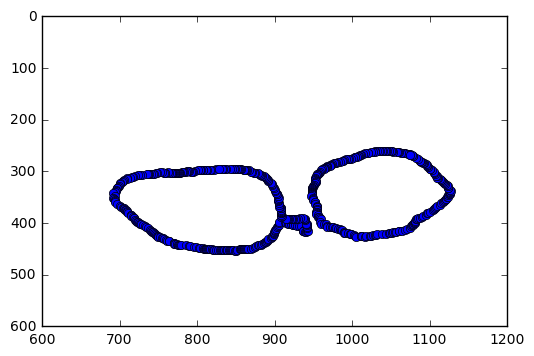

In [66]:
plt.plot(polypath.vertices[:,0], polypath.vertices[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(600, 0)

Can we separate the two paths?

In [67]:
polypath.codes

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [68]:
np.nonzero(polypath.codes==1)

(array([  0, 237], dtype=int64),)

(600, 0)

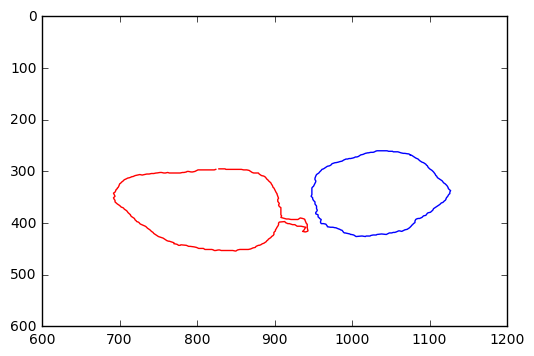

In [69]:
plt.plot(polypath.vertices[0:237,0], polypath.vertices[0:237,1])
plt.plot(polypath.vertices[238:,0], polypath.vertices[238:,1], color='red')
plt.xlim(600, 1200)  
plt.ylim(600, 0)

Can we go from polygon to mask?

In [70]:
from matplotlib.path import Path

In [71]:
from skimage.measure import grid_points_in_poly

shape=mask5[8].shape

#flip 
vert = np.fliplr(polypath.vertices)

mask8 = grid_points_in_poly(shape, vert)

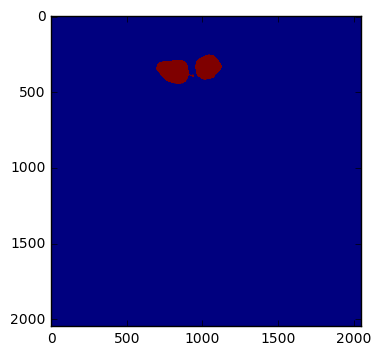

In [72]:
plt.imshow(mask8)

Write as a function

In [103]:
edges = set()
edge_points = []
for ia, ib, ic in tri.vertices:
    add_edge(ia, ib)

In [104]:
edge_points

[array([[1068,  413],
        [1071,  412]], dtype=int64), array([[1119,  357],
        [1120,  356]], dtype=int64), array([[1068,  413],
        [1070,  412]], dtype=int64), array([[1125,  342],
        [1126,  341]], dtype=int64), array([[1126,  343],
        [1126,  341]], dtype=int64), array([[1126,  341],
        [1126,  340]], dtype=int64), array([[1120,  355],
        [1121,  354]], dtype=int64), array([[1120,  355],
        [1120,  354]], dtype=int64), array([[1044,  422],
        [1055,  418]], dtype=int64), array([[1095,  385],
        [1101,  379]], dtype=int64), array([[763, 435],
        [770, 440]], dtype=int64), array([[763, 435],
        [764, 435]], dtype=int64), array([[1125,  343],
        [1125,  342]], dtype=int64), array([[1124,  346],
        [1125,  344]], dtype=int64), array([[1125,  344],
        [1125,  343]], dtype=int64), array([[1121,  353],
        [1123,  349]], dtype=int64), array([[1121,  354],
        [1123,  349]], dtype=int64), array([[1123,  349],


In [ ]:
    edges.add( (i, j) )
    edge_points.append(points[ [i, j] ])

In [240]:
def object2mask(binary_object, alpha = 0.1):

    #Convert mask row, column coordinates to x, y
    points=np.fliplr(np.transpose(np.nonzero(binary_object)))

    #Triangluate
    tri = Delaunay(points)
    print str(len(tri.vertices))+' triangles detected'

    #Initialise edges
    edges = set()
    edge_points = []

    # loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]

        # Lengths of sides of triangle
        a = math.sqrt((pa[0]-pb[0])**2 + (pa[1]-pb[1])**2)
        b = math.sqrt((pb[0]-pc[0])**2 + (pb[1]-pc[1])**2)
        c = math.sqrt((pc[0]-pa[0])**2 + (pc[1]-pa[1])**2)

        # Semiperimeter of triangle
        s = (a + b + c)/2.0

        # Area of triangle by Heron's formula
        area = math.sqrt(s*(s-a)*(s-b)*(s-c))

        if area>0:
            circum_r = a*b*c/(4.0*area)
            #print circum_r

            # Here's the radius filter.
            if circum_r < 1.0/alpha:
                add_edge(ia, ib)
                add_edge(ib, ic)
                add_edge(ic, ia)

    #print(len(edge_points))
            
    #Convert triangles to polygon
    m = MultiLineString(edge_points)
    triangles = list(polygonize(m))

    #get polygon
    ptch = PolygonPatch(cascaded_union(triangles))

    polypath = ptch.get_path()

    polypath.vertices

    #flip x,y to r,c
    vert = np.fliplr(polypath.vertices)

    mask = grid_points_in_poly(binary_object.shape, vert)
    return mask

In [245]:
test_mask = object2mask(mask5[8]==6, alpha = 0.25)

44939 triangles detected
12.747548784
12.747548784
3.53553390593
1.0
12.539936204
6.5192024052
1.58113883008
0.707106781187
80.4738834552
303.378476494
34.6770817688
6.7186308129
0.707106781187
5.7008771255
1.58113883008
0.707106781187
6.0207972894
72.7495704455
12.747548784
15.5080624193
0.707106781187
1.11803398875
1.58113883008
2.91547594742
0.707106781187
2.91547594742
5.7008771255
33.2415402772
338.001479286
8.51469318296
8.88429310989
3.53553390593
5.0
1.58113883008
3.53553390593
25.495097568
176.089176156
3.53553390593
2.01556443707
21.5058131676
1.58113883008
5.92900170556
6.85160159703
0.707106781187
5.71629084066
10.5118980208
12.747548784
0.707106781187
1.0
1.11803398875
3.53553390593
19.9123077517
66.5018796727
39.1329642231
4.88140604744
8.08690046827
7.54460585483
189.300026413
1.11803398875
1.58113883008
1.58113883008
0.707106781187
39.7857784047
76.0470982814
32.4012782845
23.9323269163
11.606990231
12.747548784
19.3416884305
15.2758851202
960.692458591
91.8006104065
3.

IndexError: index 21880 is out of bounds for axis 0 with size 21820

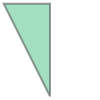

In [78]:
triangles[2]

In [238]:
def getMask(labeled_stack, z, obj, alpha=0.25):
         
    mask=np.zeros_like(labeled_stack[z])    
        
    #[1] Convert mask row, column coordinates to x, y
    points = Mask2Points(labeled_stack[z]==obj)

    #[2] Triangluate
    triangles = Delaunay(points)

    #[3] Alpha Shape
    edge_points = AlphaShape(points, triangles, alpha)

    #[4] Convert triangles to polygon
    polypath = edges2path(edge_points)

    #[5] get polygon
    mask = path2mask(labeled_stack[z], polypath)*obj
                              
    return mask     

In [242]:
mask8 = getMask(mask5, z=8, obj=6, alpha=0.05)

22499
43581 triangles detected
9276


No handlers could be found for logger "shapely.geos"


ValueError: No Shapely geometry can be created from null value

In [233]:
def TriangleMask2D(labeled_image, alpha=0.1):
         
    mask=np.zeros_like(labeled_image)    
        
    #Iterate through objects
    for obj in range(1, labeled_image.max()+1):
        print obj

        #[1] Convert mask row, column coordinates to x, y
        points = Mask2Points(labeled_image==obj)

        #[2] Triangluate
        triangles = Delaunay(points)

        #[3] Alpha Shape
        edge_points = AlphaShape(points, triangles, alpha)

        #[4] Convert triangles to polygon
        polypath = edges2path(edge_points)

        #[5] get polygon
        mask = mask+(path2mask(labeled_image, polypath)*obj)
                              
    return mask     

In [226]:
def TriangleMaskStack(labeled_stack, alpha=0.1):
    
    #Must be a 2D array
    if len(labeled_stack.shape)>2:
        
        final_mask=np.zeros_like(labeled_stack)

        #Iterate through frames
        for z, frame in enumerate(labeled_stack):
            print(z)
            
            mask=np.zeros_like(frame)
            
            #Iterate through objects
            for obj in range(1, frame.max()+1):
                
                #[1] Convert mask row, column coordinates to x, y
                points = Mask2Points(frame==obj)

                #[2] Triangluate
                triangles = Delaunay(points)
                
                #[3] Alpha Shape
                edge_points = AlphaShape(points, triangles, alpha)
                
                #[4] Convert triangles to polygon
                polypath = edges2path(edge_points)
                
                #[5] get polygon
                mask = mask+(path2mask(frame, polypath)*obj)
                
            final_mask[z]=mask
                
        return final_mask     
    else:
        print 'Input is not a 3D stack'

In [234]:
test_result = TriangleMask2D(mask5[8])

1
11941
43581 triangles detected


IndexError: index 13010 is out of bounds for axis 0 with size 11941

In [ ]:
# import numpy as np
# from matplotlib.path import Path

# nx, ny = 10, 10
# poly_verts = [(1,1), (5,1), (5,9),(3,2),(1,1)]

# # Create vertex coordinates for each grid cell...
# # (<0,0> is at the top left of the grid in this system)
# x, y = np.meshgrid(np.arange(nx), np.arange(ny))
# x, y = x.flatten(), y.flatten()

# points = np.vstack((x,y)).T

# path = Path(poly_verts)
# grid = path.contains_points(points)
# grid = grid.reshape((ny,nx))

# print grid

RuntimeError: Can not put single artist in more than one figure

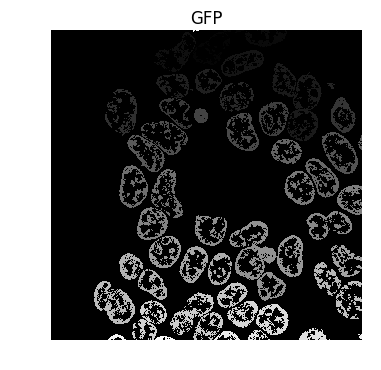

In [26]:
fig = plt.figure()
plt.imshow(mask5[8], interpolation='nearest', cmap=plt.cm.gray)
plt.axis('off')
plt.title('GFP')

ax = fig.add_subplot(1,1,1)
ax.add_patch(ptch)
ax.autoscale(tight=False)


RuntimeError: Can not put single artist in more than one figure

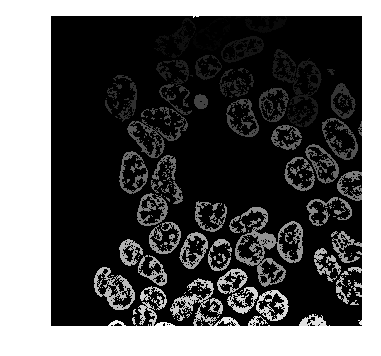

In [24]:
#Overlay over original image
plt.imshow(mask5[8], interpolation='nearest', cmap=plt.cm.gray)


ax=plt.gca()
ax.add_patch(ptch)
ax.autoscale(tight=False)
    


In [47]:
from matplotlib.patches import Polygon

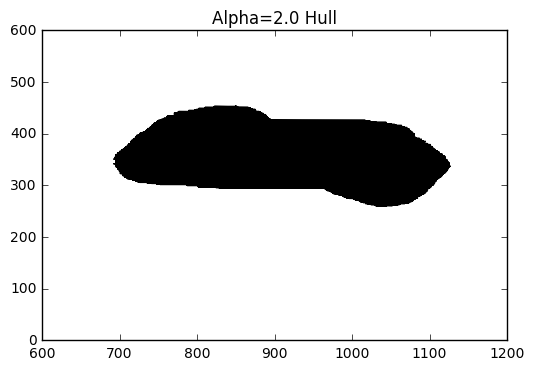

In [49]:
poly= Polygon(points)

plt.figure()
plt.title("Alpha=2.0 Hull")

plt.gca().add_patch(poly)
#plt.plot(points[:,0], points[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(0, 600)
plt.show()

In [57]:
#Extract points from alphashape
new_points = []

for line in edge_points:
    new = line[0]
    new_points.append(new)
    
new_points = np.asarray(new_points)

In [58]:
new_points[:,0]

array([1068, 1070, 1071, ..., 1013, 1013, 1013], dtype=int64)

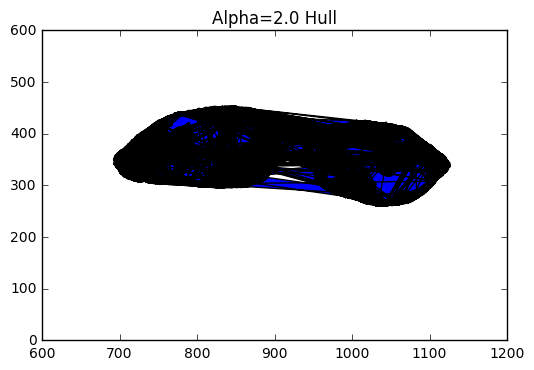

In [61]:
poly= Polygon(new_points)

plt.figure()
plt.title("Alpha=2.0 Hull")

plt.gca().add_patch(poly)
#plt.plot(new_points[:,0], new_points[:,1], 'o', hold=1)
plt.xlim(600, 1200)  
plt.ylim(0, 600)
plt.show()

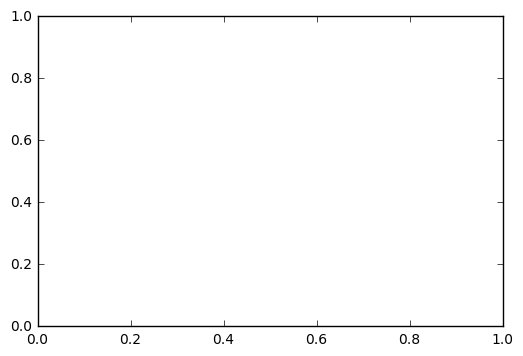

In [194]:
#Convert edges to objects?
# The same data as above, but fill the curves.

from matplotlib.collections import PolyCollection, transforms

fig, ax = plt.subplots()
col = PolyCollection(edge_points)
trans = transforms.Affine2D().scale(fig.dpi/72.0)
col.set_transform(trans)  # the points to pixels transform
ax.add_collection(col, autolim=True)
col.set_color('red')


In [62]:
from shapely.geometry import MultiLineString
from shapely.ops import cascaded_union, polygonize

In [34]:
edge_points[0][0]

array([ 0.91587715,  0.87256401])

In [11]:
##Does it work in 3D?
##Convert mask to points
points=np.transpose(np.nonzero(mask5==6))
points #z, r, c

array([[   0,  259, 1040],
       [   0,  259, 1047],
       [   0,  259, 1049],
       ..., 
       [  23,  444,  954],
       [  23,  445,  955],
       [  23,  448,  953]], dtype=int64)

In [12]:
##Much slower than 2D (13minutes for 506,144)
t0=time.time()
tri3D = Delaunay(points)
t1=time.time()
print t1-t0

796.496999979


In [13]:
#How many points are there in the 3D mask?
len(points)

506144

In [ ]:
#Perhaps we can drop points by reducing the mask to its outline?
